<a href="https://colab.research.google.com/github/dhrumilpatel28/Movie-Recommendation-System/blob/main/Recommendation_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Building a Movie Recommendation System

In [ ]:
# importing the dependencies

import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [ ]:
# Loading the dataset
movies_data = pd.read_csv("/content/movies.csv")
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [ ]:
# selectiong only important features
movies_data = movies_data[['index','genres','keywords','overview','title','cast','director']]

In [ ]:
movies_data.head()

,index,genres,keywords,overview,title,cast,director
0,0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",Avatar,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A cryptic message from Bond’s past sends him o...,Spectre,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Following the death of District Attorney Harve...,The Dark Knight Rises,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"John Carter is a war-weary, former military ca...",John Carter,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


<Axes: >

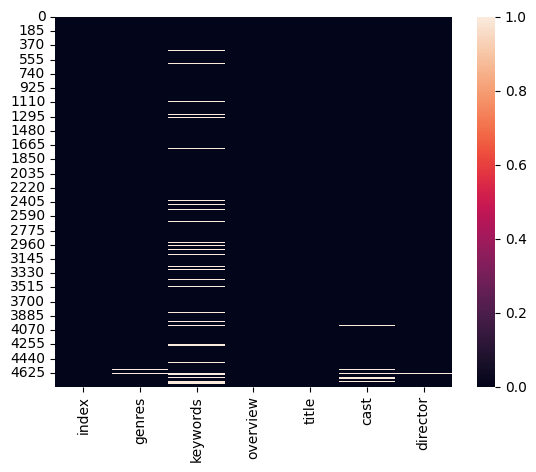

In [ ]:
# using heatmap to check for missing values
sns.heatmap(movies_data.isnull())

In [ ]:
# Replacing null values with null string
for feature in movies_data:
  movies_data[feature] = movies_data[feature].fillna("")

<Axes: >

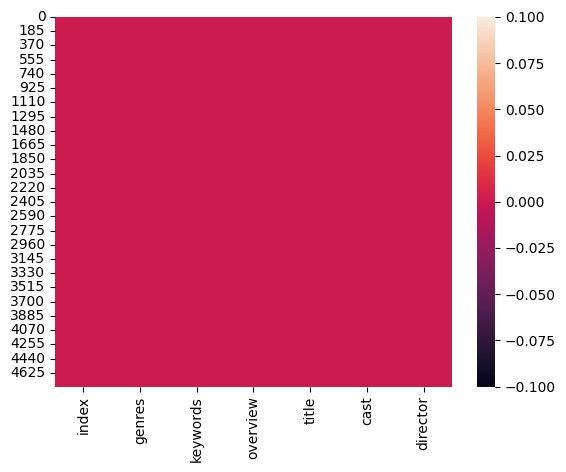

In [ ]:
sns.heatmap(movies_data.isnull()) # no missing values

In [ ]:
# combining the features

combined_features = movies_data['genres'] + ' ' + movies_data['keywords'] + ' ' + movies_data['overview'] + ' ' + movies_data['cast'] + ' ' + movies_data['director']
combined_features.head()

,0
0,Action Adventure Fantasy Science Fiction cultu...
1,Adventure Fantasy Action ocean drug abuse exot...
2,Action Adventure Crime spy based on novel secr...
3,Action Crime Drama Thriller dc comics crime fi...
4,Action Adventure Science Fiction based on nove...


In [ ]:
# converting the string into vectors
vectorize = TfidfVectorizer()

In [ ]:
feature_vector = vectorize.fit_transform(combined_features)

In [ ]:
print(feature_vector)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 286496 stored elements and shape (4803, 30088)>
  Coords	Values
  (0, 530)	0.06395123328321288
  (0, 668)	0.07378222553110117
  (0, 9576)	0.09113797346979598
  (0, 23607)	0.08500860956041037
  (0, 9842)	0.0853037546374338
  (0, 6477)	0.1603349430563257
  (0, 5183)	0.16672644228889755
  (0, 10596)	0.12441728045310145
  (0, 25016)	0.2645437924299466
  (0, 28995)	0.09351539472350907
  (0, 5492)	0.18530884510145168
  (0, 24837)	0.14386455634547538
  (0, 13234)	0.04036788240761354
  (0, 26690)	0.0614122388578492
  (0, 225)	0.21092490336654032
  (0, 4680)	0.134346535189137
  (0, 19781)	0.20603709208377594
  (0, 16738)	0.15386969208429505
  (0, 13776)	0.04821324579997663
  (0, 7676)	0.19234250055398622
  (0, 26968)	0.03407105275718965
  (0, 17952)	0.15953462271750882
  (0, 19716)	0.20190450652804282
  (0, 19228)	0.05414279518324664
  (0, 28138)	0.16672644228889755
  :	:
  (4802, 21040)	0.09305509349460295
  (4802, 8996)	0.077636512

In [ ]:
# getting similarity scores using cosine similarity

similarity = cosine_similarity(feature_vector)

In [ ]:
print(similarity)

[[1.         0.03405403 0.03366926 ... 0.0198114  0.0312866  0.0070467 ]
 [0.03405403 1.         0.03105138 ... 0.03489247 0.02038452 0.01381278]
 [0.03366926 0.03105138 1.         ... 0.02802907 0.05202542 0.01180564]
 ...
 [0.0198114  0.03489247 0.02802907 ... 1.         0.03743513 0.03653328]
 [0.0312866  0.02038452 0.05202542 ... 0.03743513 1.         0.03078044]
 [0.0070467  0.01381278 0.01180564 ... 0.03653328 0.03078044 1.        ]]


In [ ]:
# Taking input from users

movie_name = input("Enter your favorite movie name: " )

Enter your favorite movie name: iron man


In [ ]:
# Making the list of all the movies in dataset
list_of_all_movies = movies_data['title'].tolist()

In [ ]:
print(list_of_all_movies)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [ ]:
# finding the close match for the movie name by user

find_close_match = difflib.get_close_matches(movie_name , list_of_all_movies)
print(find_close_match)

['Iron Man', 'Iron Man 3', 'Iron Man 2']


In [ ]:
close_match = find_close_match[0]
close_match

'Iron Man'

In [ ]:
# finding the index of the movie with title
index_of_the_movies = movies_data[movies_data.title == close_match]['index'].values[0]
index_of_the_movies

np.int64(68)

In [ ]:
# list of the similar movies
similarity_score = list(enumerate(similarity[index_of_the_movies]))
print(similarity_score)

[(0, np.float64(0.05615057997016769)), (1, np.float64(0.03401732994623017)), (2, np.float64(0.01206485953736716)), (3, np.float64(0.007178932630920688)), (4, np.float64(0.026603003762420873)), (5, np.float64(0.015719424836411346)), (6, np.float64(0.020852624280988705)), (7, np.float64(0.18866378018547283)), (8, np.float64(0.011844771394479545)), (9, np.float64(0.03912055716867817)), (10, np.float64(0.04052502145983595)), (11, np.float64(0.014437581522556937)), (12, np.float64(0.011486038774828242)), (13, np.float64(0.011661904214599323)), (14, np.float64(0.06273515298611318)), (15, np.float64(0.0316525811836054)), (16, np.float64(0.14469485758134004)), (17, np.float64(0.017406671392341973)), (18, np.float64(0.018770686801887954)), (19, np.float64(0.037049392317246126)), (20, np.float64(0.03933855702507873)), (21, np.float64(0.028044224275424308)), (22, np.float64(0.005509543336177189)), (23, np.float64(0.021185802057101716)), (24, np.float64(0.01464048354990058)), (25, np.float64(0.003

In [ ]:
# sorting the movies based on their similarity score
sorted_similarity_score = sorted(similarity_score, key = lambda x : x[1], reverse= True)
print(sorted_similarity_score)

[(68, np.float64(0.9999999999999998)), (79, np.float64(0.330288351682709)), (31, np.float64(0.2798397406063428)), (7, np.float64(0.18866378018547283)), (16, np.float64(0.14469485758134004)), (511, np.float64(0.12644115629235936)), (26, np.float64(0.1243153196610412)), (4401, np.float64(0.1227407868492454)), (3623, np.float64(0.11469015253800394)), (64, np.float64(0.10867604016639341)), (182, np.float64(0.10087362096921061)), (174, np.float64(0.09392055905517473)), (783, np.float64(0.09335712384088657)), (4033, np.float64(0.09320244217024787)), (46, np.float64(0.09042783410277168)), (94, np.float64(0.08842442376094752)), (3466, np.float64(0.08726026247875399)), (420, np.float64(0.08465167684832091)), (30, np.float64(0.08443891270886644)), (203, np.float64(0.08345347304922131)), (33, np.float64(0.08276268282485755)), (3133, np.float64(0.0808497831319397)), (1135, np.float64(0.0806496540915352)), (2229, np.float64(0.08058131635724881)), (2235, np.float64(0.08032223915006606)), (138, np.fl

In [ ]:
# recommending the movies similar to the interest

print("The movies recommended for you :")

i = 1

for movies in sorted_similarity_score:
  index = movies[0]
  title_for_index = movies_data[movies_data.index == index]['title'].values[0]
  if i <= 30:
    print(i , title_for_index)
    i += 1


The movies recommended for you :
1 Iron Man
2 Iron Man 2
3 Iron Man 3
4 Avengers: Age of Ultron
5 The Avengers
6 X-Men
7 Captain America: Civil War
8 The Helix... Loaded
9 Made
10 X-Men: Apocalypse
11 Ant-Man
12 The Incredible Hulk
13 Mortdecai
14 Super
15 X-Men: Days of Future Past
16 Guardians of the Galaxy
17 Sliding Doors
18 Hellboy II: The Golden Army
19 Spider-Man 2
20 X2
21 X-Men: The Last Stand
22 The Devil's Tomb
23 Lord of War
24 Machete Kills
25 A Scanner Darkly
26 The Last Airbender
27 X-Men Origins: Wolverine
28 Deadpool
29 Get Rich or Die Tryin'
30 Duets


In [ ]:
# Recommendation system

movie = input("Enter your favourite movie : ")

list_of_all_movies = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie, list_of_all_movies)

close_match = find_close_match[0]

index_of_movie = movies_data[movies_data.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_movie]))

sorted_similarity_score = sorted(similarity_score , key = lambda x : x[1], reverse= True)

print("Movies recommended for you: ")

i = 1

for movie in sorted_similarity_score:
  index = movie[0]
  movies_suggested = movies_data[movies_data.index == index]['title'].values[0]
  if i <= 30:
    print(i, movies_suggested)
    i += 1

Enter your favourite movie : iron man
Movies recommended for you: 
1 Iron Man
2 Iron Man 2
3 Iron Man 3
4 Avengers: Age of Ultron
5 The Avengers
6 X-Men
7 Captain America: Civil War
8 The Helix... Loaded
9 Made
10 X-Men: Apocalypse
11 Ant-Man
12 The Incredible Hulk
13 Mortdecai
14 Super
15 X-Men: Days of Future Past
16 Guardians of the Galaxy
17 Sliding Doors
18 Hellboy II: The Golden Army
19 Spider-Man 2
20 X2
21 X-Men: The Last Stand
22 The Devil's Tomb
23 Lord of War
24 Machete Kills
25 A Scanner Darkly
26 The Last Airbender
27 X-Men Origins: Wolverine
28 Deadpool
29 Get Rich or Die Tryin'
30 Duets
